In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm 
import time # Pour mesurer les durées.

## Table des matières.
1. [Approximation de la fonction de répartition d'une Gausienne standard](#part1) 
    - 1.1 [Formule de Zelen & Severo (1964)](#part11) 
    - 1.2 [Formule de Byrc (2002B)](#part12) 
    - 1.3 [Formule de Page (1977)](#part13) 
    - 1.4 [Formule de Bagby (1995)](#part14) 
    - 1.5 [Calcul de l'erreur et temps d'exécution](#part15) 
$$\text{}$$ 
2. [Simulation de variables aléatoires de loi $\mathcal{N}(0,1)$](#part2) 
    - 2.1 [Méthode de Box Muller](#part21)
    - 2.2 [Méthode de Marsaglia](#part22)
    - 2.3 [Mesure des durées](#part23)
  $$\text{}$$   
3. [Modèle de Black-Scholes](#part3)
$$\text{}$$ 
4. [Formules de Black Scholes : Put & Call Européens](#part4) 
$$\text{}$$ 
5. [Stratégies d'options](#part5) 
    - 5.1 [Les spreads](#part51) 
         - 5.1.1  [Bull spread](#part511) 
         - 5.1.2 [Bear spread](#part512) 
         - 5.1.3 [Butterfly spread](#part513) 
         - 5.1.4 [Box spread](#part514) 
         - 5.1.5 [Calendar spread](#part515)  
         - 5.1.5 [Diagonal spread](#part515)  
    - 5.2 [Les combinaisons](#part52) 
         - 5.2.1 [Les straddles](#part521) 
         - 5.2.2 [Les strips et les straps](#part522) 
         - 5.2.3 [Les strangles](#part523) 


### 1) Approximation de la fonction de répartition d'une Gausienne standard. <a id="part1"></a>

> L'objectif de cette section est de trouver la meilleure approximation possible de la fonction de répartition d'une gausienne standard. Autrement dit nous voulons approcher : 
>
> $$ \Phi(t) = \displaystyle \int_{-\infty}^t \dfrac{1}{\sqrt{2\pi}}\text{e}^{-\frac{x^2}{2}} \, dx,$$
>
> pour $t \in \mathbb{R}$. 

Nous allons présenter plusieurs formules d'approximation pour $\phi$, et les comparer ensuite. 

#### 1.1) Formule de Zelen & Severo (1964). <a id="part11"></a>

$$\Phi(t) \approx
\begin{cases}
1 - \dfrac{\text{e}^{-\frac{t^2}{2}}}{\sqrt{2\pi}}\left(0.319381530y-0.356563782y^2+1.781477937y^3-1.821255978y^4+1.330274429y^5 \right) &\text{si } t > 0 \\ 
\dfrac{\text{e}^{-\frac{t^2}{2}}}{\sqrt{2\pi}}\left(0.319381530y-0.356563782y^2+1.781477937y^3-1.821255978y^4+1.330274429y^5 \right) &\text{sinon}
\end{cases},$$

où $y = \dfrac{1}{1+0.2316419\,|t|}$. 

In [3]:
def zelen_severo(t) : 
    z = np.abs(t)
    y = 1 / (1 + 0.2316419 * z)
    a1 = 0.319381530 
    a2 = -0.356563782
    a3 = 1.781477937
    a4 = -1.821255978
    a5 = 1.330274429
    m = 1 - np.exp(-t*t/2)*(a1*y + a2*pow(y,2) + a3*pow(y,3) + a4*pow(y,4) + a5*pow(y,5))/np.sqrt(2*np.pi)
    if(t > 0) : 
        resultat = m
    else : 
        resultat = 1 - m
    return resultat

zelen_severo(0)

0.49999999947519136

#### 1.2) Formule de Byrc (2002B). <a id="part12"></a>

$$ \Phi(t) \approx 1- \dfrac{t^2 + 5.575192695t + 12.77436324}{x^3\sqrt{2\pi} + 14.38718147t^2 + 31.53531977t + 25.548726}\text{e}^{-\frac{t^2}{2}},$$ 
pour tout $t \in \mathbb{R}$. 

In [4]:
def byrc2002B(t) : 
    return 1 - (t**2 + 5.575192695*t+12.77436324)/(t**3*np.sqrt(2*np.pi)+14.38718147*t**2+31.53531977*t + 25.548726)*np.exp(-t**2/2)

byrc2002B(0)

0.49999999060618516

#### 1.3) Formule de Page (1977). <a id="part13"></a>

$$ \Phi(t) \approx 0.5\left(1+\tanh(y)\right),$$

où $y = \sqrt{\dfrac{2}{\pi}}\times t \times\left(1+0.044715t^2\right),\,t \in \mathbb{R}.$

In [6]:
def page(t) : 
    y = np.sqrt(2/np.pi)*t*(1+0.044715*t**2)
    return 0.5*(1+np.tanh(y))

page(0)

0.5

#### 1.4) Formule de Bagby (1995). <a id="part14"></a>

$$\Phi (t) \approx 0.5 + 0.5\sqrt{1-\dfrac{1}{30}\left(7\text{e}^{-\frac{t^2}{2}}+16\text{e}^{-t^2\left(2-\sqrt{2}\right)}+\left(7+\dfrac{\pi t^2}{4}\right)\text{e}^{-t^2}\right)},$$

pour $t > 0$. 

In [8]:
def bagby(t) : 
    if(t <= 0) : return 0
    return 0.5 + 0.5*np.sqrt(1 - 1/30*(7*np.exp(-t*t/2)+16*np.exp(-t*t*(2-np.sqrt(2)))+(7+np.pi*t*t/4)*np.exp(-t*t)))

bagby(1e-15)

0.5

#### 1.5) Calcul de l'erreur et temps d'exécution. <a id="part15"></a>

In [9]:
def cum_dist_normal_with_cdf(t) : 
    return norm.cdf(t)

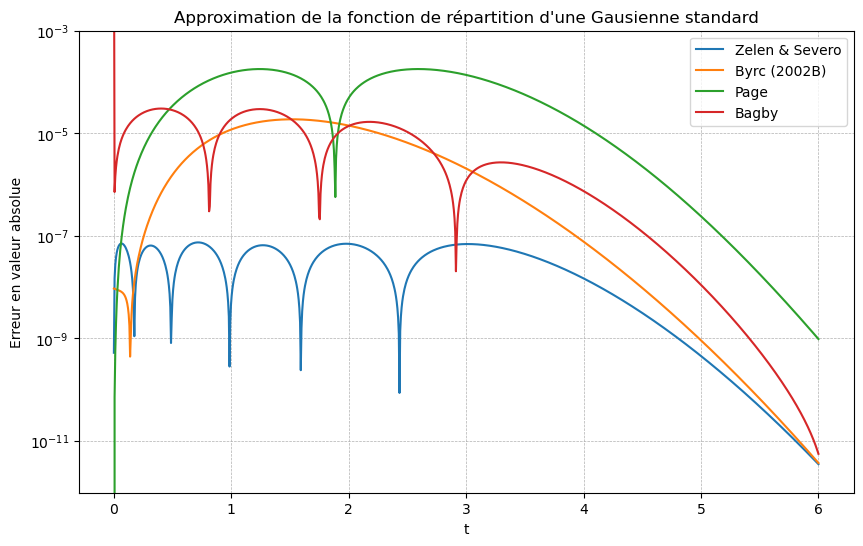

In [10]:
t_values = np.linspace(0, 6, 1000)

cdf_approx_1 = np.array([zelen_severo(t) for t in t_values])
cdf_approx_2 = np.array([byrc2002B(t) for t in t_values])
cdf_approx_3 = np.array([page(t) for t in t_values])
cdf_approx_4 = np.array([bagby(t) for t in t_values])
cdf_exact = cum_dist_normal_with_cdf(t_values)

error_1 = np.abs(cdf_approx_1 - cdf_exact)
error_2 = np.abs(cdf_approx_2 - cdf_exact)
error_3 = np.abs(cdf_approx_3 - cdf_exact)
error_4 = np.abs(cdf_approx_4 - cdf_exact)

plt.figure(figsize=(10, 6))
plt.plot(t_values, error_1, label='Zelen & Severo')
plt.plot(t_values, error_2, label='Byrc (2002B)')
plt.plot(t_values, error_3, label='Page')
plt.plot(t_values, error_4, label='Bagby')
plt.yscale('log')
plt.ylim(top = 1e-3)
plt.xlabel('t')
plt.ylabel('Erreur en valeur absolue')
plt.title('Approximation de la fonction de répartition d\'une Gausienne standard')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

Nous observons que `page(t)` est la meilleure approximation pour les valeurs asymptotiquement proches de $0$, mais se revèle beaucoup moins précise que les autres pour $t \in [1, 6]$. 

Mesurons les temps d'exécution, en calculant $\Phi(i)$ pour $100$ valeurs différentes.

In [12]:
# ------ Zelen & Severo ------ # 
start_time = time.time() 
for i in range(0,100) : 
    zelen_severo(i)
    
end_time = time.time() 
elapsed_time = end_time - start_time 
print(f"Zelen & Severo: {elapsed_time} secondes")

# ------ Byrc2002B ------ # 
start_time = time.time() 
for i in range(0,100) : 
    byrc2002B(i)
    
end_time = time.time() 
elapsed_time = end_time - start_time 
print(f"Byrc: {elapsed_time} secondes")

# ------ Page ------ # 
start_time = time.time() 
for i in range(0,100) : 
    page(i)
    
end_time = time.time() 
elapsed_time = end_time - start_time 
print(f"Page: {elapsed_time} secondes")

# ------ Bagby ------ # 
start_time = time.time() 
for i in range(0,100) : 
    bagby(i)
    
end_time = time.time() 
elapsed_time = end_time - start_time 
print(f"Bagby: {elapsed_time} secondes")

# ------ norm.cdf ------ # 
start_time = time.time() 
for i in range(0,100) : 
    cum_dist_normal_with_cdf(i)
    
end_time = time.time() 
elapsed_time = end_time - start_time 
print(f"norm.cdf : {elapsed_time} secondes") 

Zelen & Severo: 0.0009491443634033203 secondes
Byrc: 0.0005540847778320312 secondes
Page: 0.000431060791015625 secondes
Bagby: 0.0009169578552246094 secondes
norm.cdf : 0.013522863388061523 secondes


La routine optimale, offrant à la fois une grande précision et un temps d'exécution réduit, est `zelen_severo(t)`.
Mettons l'accent que l'écart entre le temps d'exécution de cette dernière et `norm.cdf(t)` est important : il est environ $15$ fois plus rapide. 

### 2) Simulation de variables aléatoires de loi $\mathcal{N}(0,1)$.<a id="part2"></a>

####  2.1) Méthode de Box-Muller. <a id="part21"></a>

Cette méthode permet de simuler un couple de variables aléatoires $(Z_1, Z_2)$ i.i.d. selon la gaussienne standard $\mathcal{N}(0,1)$, partir d'un couple de variables aléatoires $(U_1,U_2)$ i.i.d. selon la loi uniforme $\mathcal{U}\left([0,1]\right)$. La transformation dite de **Box-Muller** est la suivante : 

$$ \boxed{
\begin{cases}
    Z_1 = \sqrt{-2\ln(U_1)}\times\cos(2\pi U_2) \\
    Z_2 = \sqrt{-2\ln(U_1)}\times\sin(2\pi U_2)
\end{cases}}
$$

> **Démonstration:** Soit $\varphi : \mathbb{R}^2 \rightarrow \mathbb{R}$ borélienne (bornée ou positive). La continuité de $\varphi$ permet d'affirmer que les variables $Z_1, Z_2$ sont indépendants. Applications le théorème de transfert pour montrer que la loi en question est bien $\mathcal{N}(0,1)$. 
>
> $$\mathbb{E}[\varphi(Z_1, Z_2)] = \mathbb{E}\left[\varphi\left(\sqrt{-2\ln(U_1)}\times\cos(2\pi U_2),\sqrt{-2\ln(U_1)}\times\sin(2\pi U_2)\right)\right]  = \iint_{]0,1[^2} \varphi\left(\sqrt{-2\ln(u)}\times\cos(2\pi v),\sqrt{-2\ln(u)}\times\sin(2\pi v)\right) \, dudv.$$ 
> 
> Notons la transformation $h : (u,v) \rightarrow (x,y)$, clairement un $C_1$-difféomorphisme de $]0,1[^2 \rightarrow \mathbb{R}^2$. 
>
> Explicitement $h(u,v) = (x,y) := \left(\sqrt{-2\ln(u)}\times\cos(2\pi v),\sqrt{-2\ln(u)}\times\sin(2\pi v)\right).$ Essayons d'exprimer $u$ et $v$ en fonction de $x$ et $y$. 
>
> $$x^2+y^2 = -2\ln(u)\cos^2(2\pi v)-2\ln(u)\sin^2(2\pi v) \Leftrightarrow u = \exp\left(-\dfrac{x^2+y^2}{2}\right)$$
>
> $$\tan(2 \pi v) = \dfrac{y}{x} \Leftrightarrow v = \dfrac{1}{2 \pi}\arctan\left(\dfrac{y}{x}\right)$$ 
>
> On a : $$dxdy = \left|\,\det \left(   \begin{array}{l}
\dfrac{-\cos(2\pi v)}{u\sqrt{-2\log u}}&-2\pi\sqrt{-2\log u}\sin(2\pi v)\\
\dfrac{-\sin(2\pi v)}{u\sqrt{-2\log u}}&+2\pi\sqrt{-2\log u}\cos(2\pi v)
\end{array}    \right)\right |dudv = \left|\dfrac{-\cos(2\pi v)}{u\sqrt{-2\log u}}\times2\pi\sqrt{-2\log u}\cos(2\pi v)-2\pi\sqrt{-2\log u}\sin(2\pi v)\times\dfrac{\sin(2\pi v)}{u\sqrt{-2\log u}}     \right|dudv = \dfrac{2\pi}{u}dudv$$
>
> Ainsi : 
>
> $$\mathbb{E}[\varphi(Z_1, Z_2)] =  \iint_{\mathbb{R}^2} \varphi(x,y) \dfrac{1}{2\pi}\exp\left(-\dfrac{x^2+y^2}{2}\right) \, dxdy.$$

J'ai fait le choix d'implémenter deux routines pour la méthode de Box-Muller. 
* La première, `box_muller`, permet de simuler un couple de variables aléatoires comme décrit précédemment. 
* La seconde, `several_box_muller`, permet elle de simuler un grand nombre de réalisations. 

In [13]:
def box_muller():
    U1 = np.random.uniform(0, 1)
    U2 = np.random.uniform(0, 1)
    Z0 = np.sqrt(-2 * np.log(U1)) * np.cos(2 * np.pi * U2)
    Z1 = np.sqrt(-2 * np.log(U1)) * np.sin(2 * np.pi * U2)
    return Z0, Z1

Z0, Z1 = box_muller()
Z0, Z1

(0.6732617296225711, -0.014710130065165198)

In [14]:
def several_box_muller(n) : 
    R = np.sqrt(-2 * np.log(stats.uniform.rvs(size = n//2))) #Retourne le quotient entier de la division. 
    theta = 2 * np.pi * stats.uniform.rvs(size = n//2)
    X = np.concatenate((R * np.cos(theta), R * np.sin(theta)))
    return X 
several_box_muller(4)

array([-1.6591275 ,  1.30587262, -0.24305173, -1.63191755])

#### 2.2) Méthode de Marsaglia.<a id="part22"></a>

On définit : $$ 
\begin{cases}
    W = \sqrt{U_1}\times\cos(2\pi U_2) \\
    Z = \sqrt{U_1}\times\sin(2\pi U_2)
\end{cases}
\Leftrightarrow \begin{cases}
    U_1 = W^2+Z^2 \\
    U_2 = \dfrac{1}{2\pi}\arctan\left(\dfrac{Z}{W}\right)
\end{cases} \,\,\, (\star)$$

L'application $h : (u,v) \in \, ]0,1]^2 \rightarrow \left(\sqrt{u}\cos(2\pi v), \sqrt{u}\sin(2\pi v)\right) := (w,z)$ est une transformation du carré vers le disque unité $D$ (attention : privé de son centre).  
On a : $$dwdz = \left|\,\det \left(   \begin{array}{l}
\dfrac{\cos(2\pi v)}{2\sqrt{u}}&-2\pi\sqrt{u}\sin(2\pi v)\\
\dfrac{\sin(2\pi v)}{2\sqrt{u}}&2\pi\sqrt{u}\cos(2\pi v)
\end{array}    \right)\right |dudv = \left| \pi \left(\cos^2(2\pi v)+\sin^2(2\pi v) \right)\right|dudv = \pi dudv$$

Ainsi, pour $\varphi : \mathbb{R}^2 \rightarrow \mathbb{R}$ borélienne bornée (resp. positive) on a : 

$$ \mathbb{E}[\varphi(W,Z)] = \iint_{]0,1]^2} \varphi\left(\sqrt{u}\cos(2\pi v), \sqrt{u} \sin(2 \pi v)\right) dudv = \iint_D \varphi(w,z)\dfrac{1}{\pi} dwdz = \dfrac{1}{|D|} \iint_D \varphi(w,z)dwdz.$$ 

Ceci montre que $(W,Z)$ est uniformément distribué sur $D$. 

Nous allons simuler cette loi par la **méthode du rejet**. La densité cible est $f(w,z) = \dfrac{1}{\pi} \boldsymbol 1_{(w,z) \in D}$, et on utilise la densité instrumentale $g(w,z) = \dfrac{1}{4} \boldsymbol 1_{(w,z) \in [-1,1]^2}$. Nous avons bien $f \leq mg$ avec $ m= \dfrac{4}{\pi}$. L'algorithme de rejet revient à échantilloner sur le carré $[-1,1]^2$ puis à converser uniquement les points tombant à l'intérieur du cercle unité. 

Taille de l'échantillon :  1548


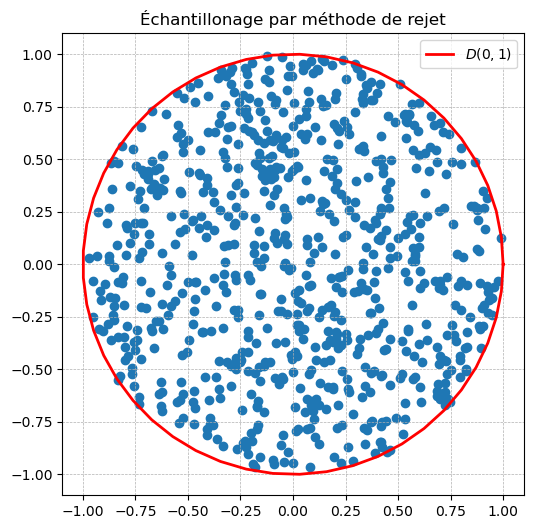

In [15]:
n = 10**3 
unif = stats.uniform(loc = -1, scale = 2)
z = unif.rvs(size = (2,n))
s = np.sum(z**2, axis = 0)
z = z[:, np.logical_and(0 < s, s <= 1)] #Filtrage des points, on garde ceux dans le cercle unité. 
print("Taille de l'échantillon : ", z.size)

t = np.linspace(0, 2*np.pi, 50)
plt.figure(figsize = (10,6))
plt.scatter(z[0], z[1])
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.plot(np.cos(t), np.sin(t), 'r', lw = 2, label = fr"$D(0,1)$")
plt.axis('image')
plt.title("Échantillonage par méthode de rejet")
plt.legend();

La définition ($\star$) permet d'affimer que : 
$$ 
\begin{cases}
    Z_1 = \sqrt{-2\ln(U_1)}\times\cos(2\pi U_2) \\
    Z_2 = \sqrt{-2\ln(U_1)}\times\sin(2\pi U_2)
\end{cases}
\Leftrightarrow 
\begin{cases}
    Z_1 = \sqrt{-2\ln(W^2+Z^2)}\dfrac{W}{\sqrt{W^2+Z^2}} \\
    Z_2 = \sqrt{-2\ln(W^2+Z^2)}\dfrac{Z}{\sqrt{W^2+Z^2}}
\end{cases}$$

L'avantage de cette méthode, couramment nommée la *méthode polaire de Marsaglia*, est qu'elle permet de s'affranchir des calculs de `np.cos` et `np.sin` et qui sont particulièrement couteux (cf. partie suivante sur la mesure des durées). 

Taille de l'échantillon :  10000000


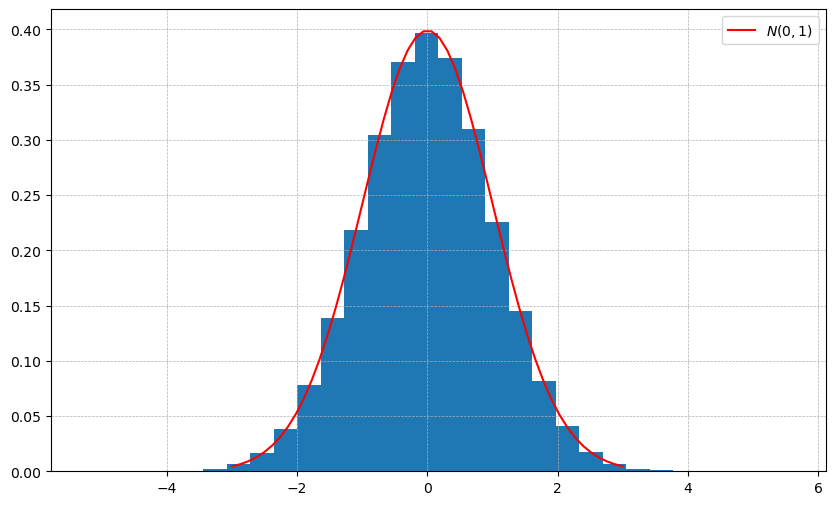

In [16]:
n = 10**7 

unif = stats.uniform(loc = -1, scale = 2)
z = unif.rvs(size = (2, int(n/2*1.5))) # On en génère un peu plus pour être certain d'en avoir assez 
                                       # après le filtrage. 
s = np.sum(z**2, axis = 0)
z = z[:, np.logical_and(0 < s, s <= 1)][:, :n//2] # Filtrage. On en conserve seulement n//2. 
print("Taille de l'échantillon : ", z.size)

s = np.sum(z**2, axis = 0)
X = (np.sqrt(-2*np.log(s))* z/np.sqrt(s)).ravel() # On met dim(X) = 1

norm = stats.norm 
plt.figure(figsize =(10,6))
x = np.linspace(-3,3)
plt.hist(X, bins = 30, density = True)
plt.plot(x,norm.pdf(x), 'r',label=fr"$N(0,1)$")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend();

In [17]:
def marsaglia():
    while True:
        U = np.random.uniform(-1, 1)
        V = np.random.uniform(-1, 1)
        S = U**2 + V**2
        if S > 0 and S < 1:
            factor = np.sqrt(-2 * np.log(S) / S)
            Z0 = U * factor
            Z1 = V * factor
            return Z0, Z1

In [18]:
def several_marsaglia(n):
    unif = stats.uniform(loc = -1, scale = 2)
    z = unif.rvs(size = (2, int(n/2*1.5))) # On en génère un peu plus pour être certain d'en avoir assez 
                                       # après le filtrage. 
    s = np.sum(z**2, axis = 0)
    z = z[:, np.logical_and(0 < s, s <= 1)][:, :n//2] # Filtrage. On en conserve seulement n//2. 
    #print("Taille de l'échantillon : ", z.size)

    s = np.sum(z**2, axis = 0)
    X = (np.sqrt(-2*np.log(s))* z/np.sqrt(s)).ravel() # On met dim(X) = 1
    return X

In [19]:
def several_box_muller(n) : 
    R = np.sqrt(-2 * np.log(stats.uniform.rvs(size = n//2))) #Retourne le quotient entier de la division. 
    theta = 2 * np.pi * stats.uniform.rvs(size = n//2)
    X = np.concatenate((R * np.cos(theta), R * np.sin(theta)))
    return X 
several_box_muller(4)

array([-0.77905715,  0.59011554, -0.53229584, -0.24292389])

#### 2.3) Mesure des durées.<a id="part23"></a>

Regardons à l'aide de la bibliothèque `time` le temps d'exécution des différentes routines, pour `n = 2`.

In [20]:
n = 2

In [21]:
# ------ scipy.norm.rvs ------ # 
start_time = time.time() 

X = stats.norm.rvs(size = n) 

end_time = time.time() 
elapsed_time = end_time - start_time 
print(f"scipy.norm.rvs :", elapsed_time)

# ------ box_muller() ------ # 
start_time = time.time() 

X = box_muller()

end_time = time.time() 
elapsed_time = end_time - start_time 
print(f"Box muller :", elapsed_time)

# ------ marsaglia() ------ # 
start_time = time.time() 

X = marsaglia()

end_time = time.time() 
elapsed_time = end_time - start_time 
print(f"Marsaglia :", elapsed_time)

scipy.norm.rvs : 0.008140087127685547
Box muller : 0.00010609626770019531
Marsaglia : 7.510185241699219e-05


### 3) Modèle de Black-Scholes.<a id="part3"></a>

Soit $(\Omega, \mathcal{F}, \mathbb{P})$ un espace de probabilité filtré. Cette probabilité $\mathbb{P}$ est appelée probabilité historique, à ne pas confondre avec la probabilité neutre au risque. 
On se fixe un horizon de temps $T$, et deux actifs $S_t, B_t$, pour $0 \leq t \leq T$.
Par définition : 
 
$$ dB_t = r B_t dt, \\dS_t = \mu S_t dt + \sigma S_t dW_t \text{  }(\star)$$

où on définit : 
* $W$, un $\mathbb{P}$-mouvement brownien.
* $S_t$, le prix spot de l'actif sous-jacent au temps $t$.
* $B_t$, le bond. 
* $T$, la maturité de l'option.
* $K$, le strike.
* $r$, le taux sans risque, supposé constant.
* $\mu$, le drift.
* $\sigma$, la volatilité de l'actif sous-jacent.
* $q$, le taux de dividende de l'actif sous-jacent. Ce dernier est supposé verser des dividendes à un rythme continu.

Par application du lemme d'Itô, et par unicité de solution à l'EDS ($\star$)


$$S_t = S_0 \text{e}^{\left(\mu-q- \frac{\sigma ^2}{2}\right)t - \sigma W_t}.$$

En effet, l'EDS $(\star)$ admet une unique solution à condition initiale près (les coefficients sont Lipschitziens sur $\mathbb{R}$ en espace, et constants en fonction du temps). On applique ensuite le lemme d'Itô à la fonction $$f(t,x)= S_0 \text{e}^{\left(\mu-q- \frac{\sigma ^2}{2}\right)t - \sigma x},$$ 

qui est bien $\mathcal{C}^{1,2}
(\mathbb{R}^{+} \times \mathbb{R}).$ En vertu de l'unicité, on a bien l'égalité mentionnée ci-dessus.

Voyons à présent une autre façon de caractériser le prix spot. 

Par définition du mouvement brownien 
$$W_t-W_u \sim \mathcal{N}(0,t-u), \, \forall t \geq u \geq 0.$$
En prenant $u = 0$, on obtient : 
$$W_t \sim \mathcal{N}(0,t), \, \forall t \geq 0.$$ 
Au final : 
$$ W_t \stackrel{\mathcal{L}}{=} \sqrt{t}Z,$$
où $Z \sim \mathcal{N}(0,1)$.


Ainsi pour toutes valeurs $t_1 < t_2$, on peut écrire : 
$$\ln\left(\frac{S_{t_2}}{S_{t_1}}\right) = \left(\mu-q-\frac{\sigma ^2}{2} \right)(t_2-t_1) + \sigma \sqrt{t_2-t_1} Z, $$
c'est à dire que $\dfrac{S_{t_2}}{S_{t_1}}$ suit une loi log-normale avec comme paramètres $\left(\mu-q-\frac{\sigma ^2}{2} \right)(t_2-t_1)$ et $\sigma ^2 (t_2 - t_1)$.

Appliquons ces résultats pour $t_1 = 0$, $t_2 = t$. 

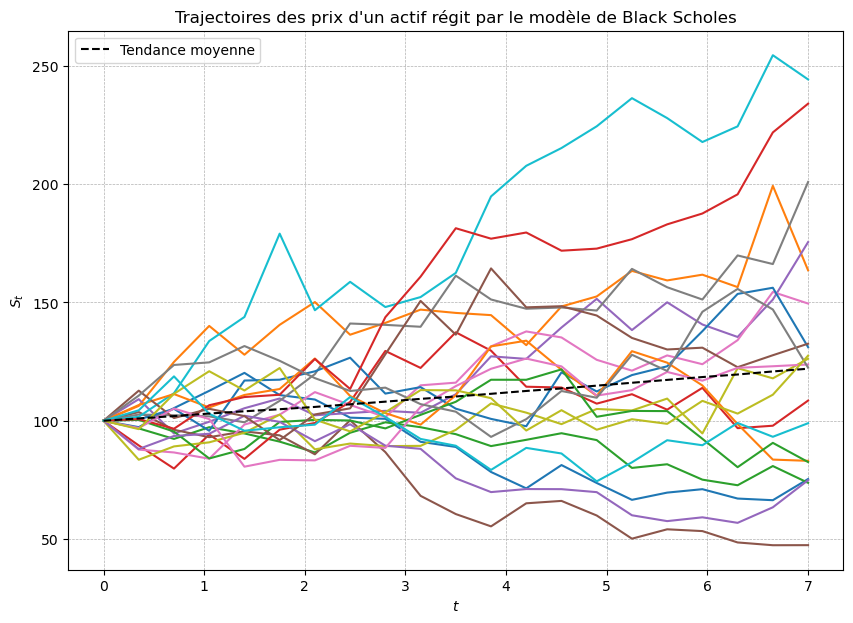

In [3]:
mu = 0.2
sigma = 0.4
npaths = 20000
nsteps = 20
npathsplot = 20

T = 1 
dt = T/nsteps
S0 = 100 

t = np.linspace(0,7, nsteps+1)

dX = (mu - 0.5*sigma**2)*dt + sigma*np.sqrt(dt)*np.random.normal(size = (npaths, nsteps))

X = np.concatenate((np.zeros((npaths,1)), np.cumsum(dX, axis = 1)), axis = 1)

S = S0*np.exp(X)

fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(111)

for i in range(0, npaths, round(npaths/npathsplot)) : 
    ax.plot(t, S[i,:])
ax.plot(t, np.mean(S,axis = 0), 'k--', label = "Tendance moyenne")
ax.set_title("Trajectoires des prix d'un actif régit par le modèle de Black Scholes")
ax.set_xlabel(fr"$t$")
ax.set_ylabel(fr"$S_t$")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.legend();

**Construction d'intervalles de confiance pour $S_T$ :**


On sait que $\ln(S_T) \sim \mathcal{N}\left(\ln(S_0) + \left(\mu - q -\dfrac{\sigma^2}{2}\right)T, \sigma^2T \right)$.

Autrement dit $\left( \ln(S_T) - \ln(S_0) - \left(\mu - q - \dfrac{\sigma^2}{2}\right) T \right)\dfrac{1}{\sigma\sqrt{T}} \sim \mathcal{N}(0,1)$.  

En notant $\phi$ la fonction de répartition de la gaussienne centrée réduite, il vient que : 

$$\begin{equation}
\mathbb{P}\left(-\Phi^{-1}\left(1-\dfrac{\alpha}{2}\right)\leq \left( \ln(S_T) - \ln(S_0) - \left(\mu - q - \dfrac{\sigma^2}{2}\right) T \right)\dfrac{1}{\sigma\sqrt{T}} \leq  \Phi^{-1}\left(1-\dfrac{\alpha}{2}\right)\right) = 1 - \alpha, \\
\Leftrightarrow \mathbb{P}\left(S_0e^{\left(\mu-q-\frac{\sigma^2}{2}\right)T - \Phi^{-1}\left(1-\frac{\alpha}{2}\right)\sigma\sqrt{T}}\leq S_T \leq S_0e^{\left(\mu-q-\frac{\sigma^2}{2}\right)T + \Phi^{-1}\left(1-\frac{\alpha}{2}\right)\sigma\sqrt{T}} \right) = 1 - \alpha.
\end{equation}$$

### 4) Formules de Black Scholes : Put & Call Européens <a id="part4"></a>

Faisons les hypothèses que le prix de l'actif sous jacent suit une distribution log-normale, de volatilité $\sigma$, en payant des dividendes à un rythme continu au taux $q$. Enfin, supposons que le taux d'intérêt sans risque est constant, de valeur $r$. 

Notons $C_t$ (resp. $P_t$) la valeur en $t$ d'un call (resp. put) de strike $K$ et de maturité $T$ (pour l'actif sous jacent $S$).

Nous obtenons 

$$C_t = S_t\text{e}^{-q(T-t)}\mathcal{N}(d_1) - K\text{e}^{-r(T-t)}\mathcal{N}(d_2),$$

$$P_t = K\text{e}^{-r(T-t)}\mathcal{N}(-d_2) - S_t\text{e}^{-q(T-t)}\mathcal{N}(-d_1),$$

avec $d_1 = \dfrac{\ln{\left(\dfrac{S}{K}\right)} + \left(r-q+\dfrac{\sigma ^2}{2}\right)(T-t)}{\sigma \sqrt{T-t}}$, $d_2 = d_1 - \sigma \sqrt{T-t} = \dfrac{\ln{\left(\dfrac{S}{K}\right)} + \left(r-q-\dfrac{\sigma ^2}{2}\right)(T-t)}{\sigma \sqrt{T-t}}.$

> **Démonstration :**
>
> On a $C_t = \text{e}^{-r(T-t)} \mathbb{E}_{RN}[C_T]$, où 
$\mathbb{E}_{RN}$ est l'espérance sous la probabilité risque neutre. Cette dernière est obtenue par le théorème de Girsanov. Rappelons que le *payoff* d'un tel call est $(S_T-K)^{+}$, et que $S_T = S_t \text{e}^{\left(r-q-\frac{\sigma^2}{2}\right)(T-t) + \sigma \sqrt{T-t}Z}$, où ici $Z \sim \mathcal{N}(0,1)$ sous $\mathbb{P}_{RN}$.
>
> $S_T \geq K \, \Leftrightarrow \, Z \geq \dfrac{\ln{\left(\dfrac{K}{S_t}\right)} - \left(r-q-\dfrac{\sigma ^2}{2}\right)(T-t)}{\sigma \sqrt{T-t}} = -d_2$
>
> Ainsi $C_t = \text{e}^{-r(T-t)} \displaystyle \int_{-d_2}^{+\infty} \left(S_t \text{e}^{\left(r-q-\frac{\sigma^2}{2}\right)(T-t) + \sigma \sqrt{T-t}x}-K \right) \dfrac{1}{\sqrt{2\pi}}\text{e}^{-\frac{x^2}{2}}\, dx$
> 
> $\Leftrightarrow C_t = \text{e}^{-r(T-t)}\displaystyle \int_{-d_2}^{+\infty} S_t \text{e}^{\left(r-q-\frac{\sigma^2}{2}\right)(T-t)+ \sigma \sqrt{T-t}x}\dfrac{1}{2\pi}\text{e}^{-\frac{x^2}{2}}\, dx - K\text{e}^{-r(T-t)} \displaystyle \int_{-d_2}^{+\infty}\dfrac{1}{\sqrt{2\pi}}\text{e}^{-\frac{x^2}{2}}\, dx$
>
> $\Leftrightarrow C_t = S_t\text{e}^{-q(T-t)} \displaystyle \int_{-d_2}^{+\infty} \dfrac{1}{\sqrt{2\pi}} \text{e}^{-\frac{1}{2}\left(x-\sigma \sqrt{T-t}\right)^2} \, dx - K\text{e}^{-r(T-t)}(1- \mathcal{N}(-d_2))$
>
> $\Leftrightarrow C_t = S_t\text{e}^{-q(T-t)} \displaystyle \int_{-d_2-\sigma \sqrt{T-t}}^{+\infty} \dfrac{1}{\sqrt{2\pi}} \text{e}^{-\frac{y^2}{2}} \, dy - K\text{e}^{-r(T-t)}\mathcal{N}(d_2)$
>
> $\Leftrightarrow C_t = S_t\text{e}^{-q(T-t)}\mathcal{N}(d_2+\sigma \sqrt{T-t}) - K\text{e}^{-r(T-t)}\mathcal{N}(d_2)$
>
> $\Leftrightarrow C_t = S_t\text{e}^{-q(T-t)}\mathcal{N}(d_1) - K\text{e}^{-r(T-t)}\mathcal{N}(d_2)$
>
> Maintenant, en utilisant la parité Call-Put, il vient que : 
>
> $P_t = K\text{e}^{-r(T-t)} - S_t\text{e}^{-q(T-t)}+C_t$
>
> $\Leftrightarrow P_t = K\text{e}^{-r(T-t)} - S_t\text{e}^{-q(T-t)} + S_t\text{e}^{-q(T-t)}\mathcal{N}(d_1) - K\text{e}^{-r(T-t)}\mathcal{N}(d_2)$
>
> $\Leftrightarrow P_t = K\text{e}^{-r(T-t)}(1-\mathcal{N}(d_2))- S_t\text{e}^{-q(T-t)}(1-\mathcal{N}(d_1))$
>
> $\Leftrightarrow P_t = K\text{e}^{-r(T-t)}\mathcal{N}(-d_2)- S_t\text{e}^{-q(T-t)}\mathcal{N}(-d_1)$

**Interprétation de $\mathcal{N}(d_1)$ et $\mathcal{N}(d_2)$ :**

Pour des raisons de clarté, prenons $t = q = 0$. 
Ainsi : 

$$C_0 = S_0\mathcal{N}(d_1)-Ke^{-rT}\mathcal{N}(d_2).$$
On peut écrire le prix de call de cette façon : 

$$C_0 = e^{-rT}\mathcal{N}(d_2)\left(\dfrac{S_0e^{rT}\mathcal{N}(d_1)}{\mathcal{N}(d_2)} -K\right).$$

- Le terme $\mathcal{N}(d_2)$ est la probabilité (sous $\mathbb{P}_{RN}$) que l'option soit exercée. 
- $\dfrac{S_0e^{rT}\mathcal{N}(d_1)}{\mathcal{N}(d_2)}$ est le prix espéré (sous $\mathbb{P}_{RN}$) du sous-jacent en cas d'exercice. 

Commencons par implémenter les routines `black_scholes_call` et `black_scholes_put` permettent de calculer respectivement le prix d'un call et d'un put portant sur un actif sous jacent régit par le modèle de Black - Scholes. 

In [5]:
def black_scholes_call(t, S, K, T, sigma, r, q) : 
    d1 = (np.log(S/K) + (r-q+sigma*sigma/2)*(T-t))/(sigma*np.sqrt(T-t))
    d2 = d1 - sigma*np.sqrt(T-t) 
    C = S*np.exp(-q*(T-t))*zelen_severo(d1) - K*np.exp(-r*(T-t))*zelen_severo(d2)
    return C 

In [6]:
def black_scholes_put(t, S, K, T, sigma, r, q) : 
    d1 = (np.log(S/K) + (r-q+sigma*sigma/2)*(T-t))/(sigma*np.sqrt(T-t))
    d2 = d1 - sigma*np.sqrt(T-t) 
    P = -S*np.exp(-q*(T-t))*zelen_severo(-d1) + K*np.exp(-r*(T-t))*zelen_severo(-d2)
    return P 

> **Exemple :** Calculer le prix au temps $0$ d'un call (resp. put) de spot $S = 100$, $K = 100$, $T = 1$, $\sigma = 0.2$, $r = 0.05$ et $ q = 0$. 
>
> Les formules de Black-Scholes donnent : $C_0 \approx 10.45$, et $P_0 \approx 5.57$. 

In [27]:
t = 0
K = 100
T = 1
sigma = 0.2
r = 0.05
q = 0 
print("C_0 = ", black_scholes_call(t, K, K, T, sigma, r, q))
print("P_0 = ", black_scholes_put(t, K, K, T, sigma, r, q))

C_0 =  10.450575619322265
P_0 =  5.573518069393671


**Attention :** Dans ce qui suivra nous ignorons l'actualisation ($B = 1$). 

Supposons que nous soyons détenteur (i.e. en position longue) d'une option européenne : par définition celle-ci ne peut s'exercer qu'à échéance. Sous les mêmes conditions que l'exemple précédent, regardons dans quel cas nous réalisons un profit. 

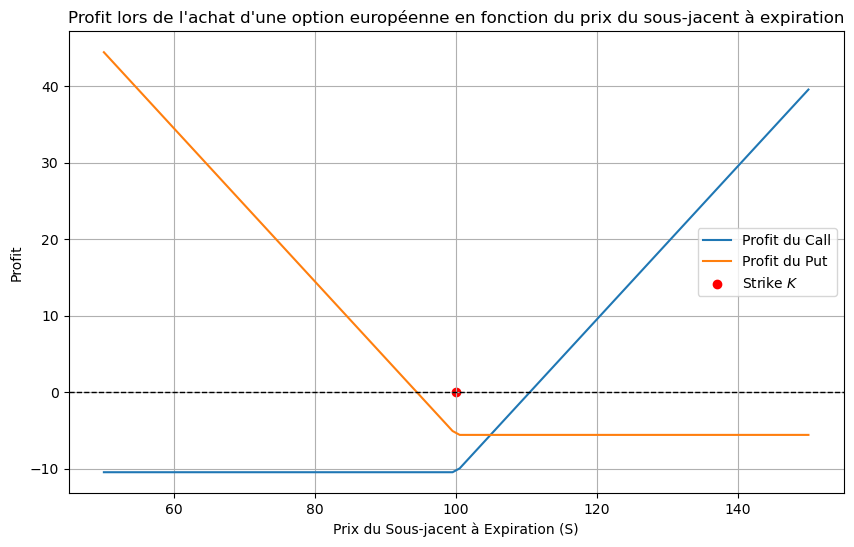

In [28]:
S_expiration = np.linspace(50, 150, 100)

call_initial_price = black_scholes_call(t, K, K, T, sigma, r, q)
put_initial_price = black_scholes_put(t, K, K, T, sigma, r, q)

profit_values_call = [max(S - K, 0) - call_initial_price for S in S_expiration]
profit_values_put = [max(K - S, 0) - put_initial_price for S in S_expiration]

plt.figure(figsize=(10, 6))
plt.plot(S_expiration, profit_values_call, label='Profit du Call')
plt.plot(S_expiration, profit_values_put, label='Profit du Put')
plt.scatter(K, 0, color='r', label=fr"Strike $K$", alpha = 1)
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Prix du Sous-jacent à Expiration (S)')
plt.ylabel('Profit')
plt.title('Profit lors de l\'achat d\'une option européenne en fonction du prix du sous-jacent à expiration')
plt.legend()
plt.grid(True)
plt.show()

* Pour le *call*, le détenteur réalise un bénéfice dès que le cours du sous jacent dépasse $K + C_0 \approx 110.45$, l'option étant exercée dès que le cours dépasse $100$, même si l'on subit une perte (inférieure à celle encourue au cas où on choisit de ne pas exercer l'option). 
* Pour le *put*, le détenteur réalise un bénéfice dès que le cours du sous jacent est inférieur à $K - P_0 \approx 94.43$, l'option étant exercée dès que le cours est inférieurà $100$, même si l'on subit une perte (inférieure à celle encourue au cas où on choisit de ne pas exercer l'option). 

Toujours en ignorant l'actualisation, supposons maintenant que nous sommes en position courte sur ces mêmes options (nous les vendons). Regardrons dans quel cas nous réalisons un profit : 

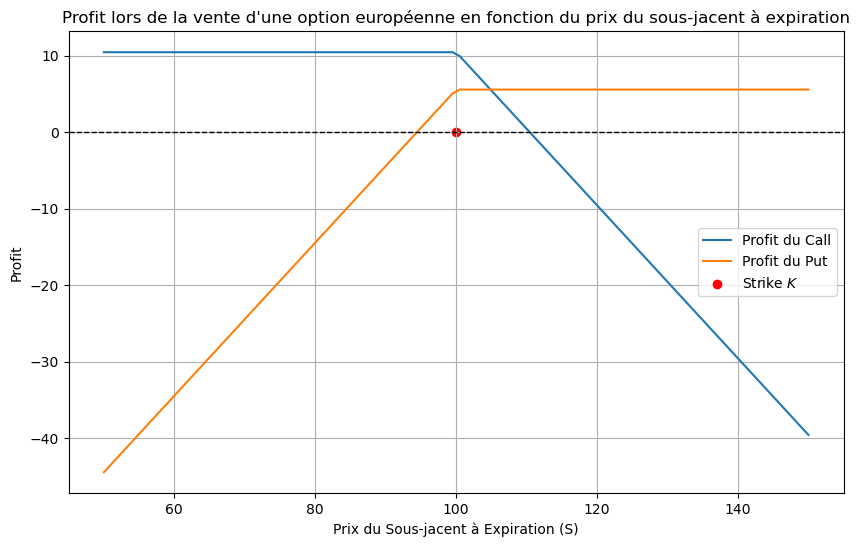

In [29]:
S_expiration = np.linspace(50, 150, 100)

call_initial_price = black_scholes_call(t, K, K, T, sigma, r, q)
put_initial_price = black_scholes_put(t, K, K, T, sigma, r, q)

profit_values_call = [call_initial_price - max(S - K, 0) for S in S_expiration]
profit_values_put = [put_initial_price - max(K - S, 0) for S in S_expiration]

plt.figure(figsize=(10, 6))
plt.plot(S_expiration, profit_values_call, label='Profit du Call')
plt.plot(S_expiration, profit_values_put, label='Profit du Put')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.scatter(K, 0, color='r', label=fr"Strike $K$", alpha = 1)
plt.xlabel('Prix du Sous-jacent à Expiration (S)')
plt.ylabel('Profit')
plt.title('Profit lors de la vente d\'une option européenne en fonction du prix du sous-jacent à expiration')
plt.legend()
plt.grid(True)
plt.show()

De manière complémentaire à la position longue : 
* Pour le *call*, l'investisseur en position courte réalisera un bénéfice dès que le cours de l'actif sera inférieur à $K+ C_0 \approx 110.45$. 
* Pour le *put*, l'investisseur en position courte réalisera un bénéfice dès que le cours de l'actif sera supérieur à $K - P_0 \approx 94.43$. 

Nous voyons que certaines positions prises sur les options sont intéréssantes lors d'une chute du cours de l'actif (long put & short call). Cela amène à introduire les **stratégies d'options**. 

### 5) Stratégies d'options. <a id="part5"></a>

#### 5.1) Les spreads. <a id="part51"></a>

#### 5.1.1) Bull spread. <a id="part511"></a>

Le **Bull spread** est une stratégie d’options qui parie sur une augmentation du cours du sous-jacent. Le Bull Spread a donc les mêmes conséquences que l’achat direct du sous-jacent, sauf qu’il permet de réduire le risque en limitant à la fois les gains et les pertes.

Il s'agit de la combinaison de deux calls ayant le même sous-jacent et la même date d’échéance. L’idée est d’acheter le call ayant le strike le plus faible et de vendre le call ayant le strike le plus élevé. On peut bien évidemment faire de même avec des puts. 


> **Exemple:** Déterminons le payoff à maturité du bull spread en prenant une position longue sur un call $C_1$ de strike $30$, et une position courte sur un call $C_2$ de strike $35$. Le portefeuille sera alors 
>
> $$V(T) = C_1(T) - C_2(T) = (S_T - 30)^+ - (S_T - 35)^+ - C_1(0) + C_2(0),$$
>
> |           | $S_T < 30$   |  $30 < S_T <35 $    | $35 < S_T $       |
|:-------------:|:--------------:|:---------------------:|:--------------------: 
|$C_1(T)$     |$0$           |$S_T-30$             |$S_T-30$           | 
|$C_2(T)$     |$0$           |$0$                  |$S_T-35$           | 
|$V(T)$       |$- C_1(0) + C_2(0)$           |$S_T-30- C_1(0) + C_2(0)$             |$5- C_1(0) + C_2(0)$                | 
 


In [30]:
t = 0
S_0 = 32.5
K_1 = 30
K_2 = 35 
T = 1 
sigma = 0.2 
r = 0.05
q = 0 
print(f"V_0 = ", black_scholes_call(t, S_0, K_1, T, sigma, r, q)-black_scholes_call(t, S_0, K_2, T, sigma, r, q))

V_0 =  2.6636935134890045


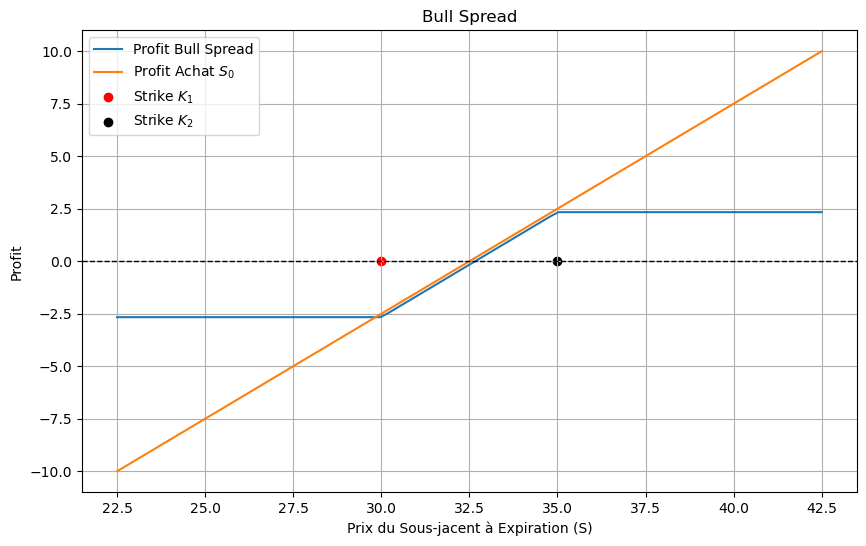

In [31]:
S_expiration = np.linspace(22.5, 42.5, 100)

call_1_initial_price = black_scholes_call(t, S_0, K_1, T, sigma, r, q)
call_2_initial_price = black_scholes_call(t, S_0, K_2, T, sigma, r, q)

profit_achat_actif = [(S - S_0) for S in S_expiration]
profit_bull_spread = [(max(S - K_1, 0) - max(S - K_2, 0) - call_1_initial_price + call_2_initial_price) for S in S_expiration]

plt.figure(figsize=(10, 6))
plt.plot(S_expiration, profit_bull_spread, label='Profit Bull Spread')
plt.plot(S_expiration, profit_achat_actif, label=fr"Profit Achat $S_0$")
plt.scatter(K_1, 0, color='r', label=fr"Strike $K_1$", alpha = 1)
plt.scatter(K_2, 0, color='black', label=fr"Strike $K_2$", alpha = 1)
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Prix du Sous-jacent à Expiration (S)')
plt.ylabel('Profit')
plt.title('Bull Spread')
plt.legend()
plt.grid(True)
plt.show()

#### 5.1.2) Bear spread. <a id="part512"></a>

Le **Bear spread** est une stratégie d’option qui parie sur une diminution du cours du sous-jacent. Le Bear spread a donc les mêmes conséquences que la vente directe du sous-jacent, sauf qu’il permet de réduire le risque en limitant à la fois les gains et les pertes.

* Il peut s'agir de la combinaison de deux puts ayant le même sous-jacent et la même date d’échéance. L’idée est d’acheter le put ayant le strike le plus élevé et de vendre le put ayant le strike le plus faible.

* L'autre possibilité est de prendre une position courte sur le call de prix d'exercice le plus faible associée à une position longue sur le call de prix d'exercice le plus élevé. 

> **Exemple:** Déterminons le payoff à maturité du bear spread en prenant une position longue sur un put $P_1$ de strike $35$, et une position courte sur un put $P_2$ de strike $30$. Le portefeuille sera alors 
>
> $$V(T) = P_1(T) - P_2(T) = (35 - S_T)^+ - (30 - S_T)^+ - P_1(0) + P_2(0),$$
>
> |           | $S_T < 30$           |  $30 < S_T <35 $         | $35 < S_T $           |
|:-----------:|:--------------------:|:------------------------:|:----------------------: 
|$P_1(T)$     |$35-S_T$              |$35-S_T$                  |$0$                    | 
|$P_2(T)$     |$30-S_T$              |$0$                       |$0$                    | 
|$V(T)$       |$5- P_1(0) + P_2(0)$  |$35-S_T- P_1(0) + P_2(0)$ |$0- P_1(0) + P_2(0)$   | 
 


In [32]:
t = 0
S_0 = 32.5
K_1 = 30
K_2 = 35 
T = 1 
sigma = 0.2 
r = 0.05
q = 0 
print(f"V_0 = ", black_scholes_put(t, S_0, K_2, T, sigma, r, q)-black_scholes_put(t, S_0, K_1, T, sigma, r, q))

V_0 =  2.092453609014565


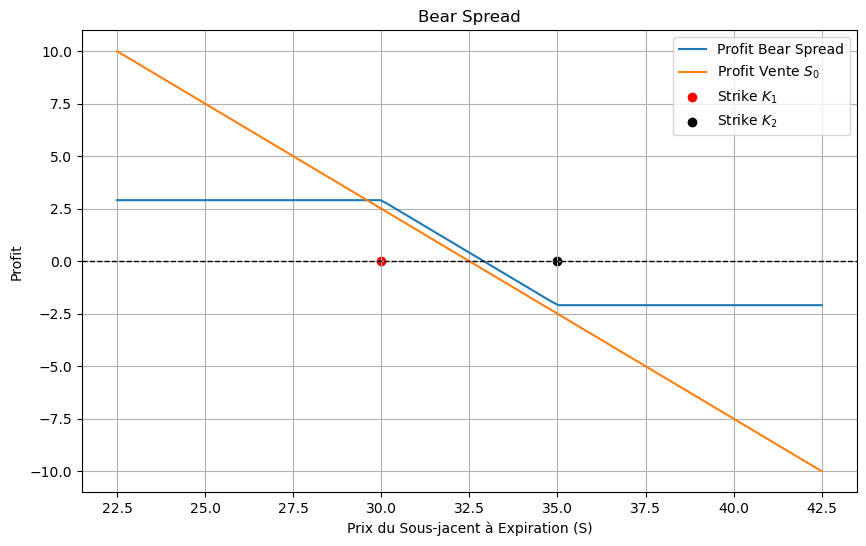

In [33]:
S_expiration = np.linspace(22.5, 42.5, 100)

put_1_initial_price = black_scholes_put(t, S_0, K_2, T, sigma, r, q)
put_2_initial_price = black_scholes_put(t, S_0, K_1, T, sigma, r, q)

profit_vente_actif = [(S_0 - S) for S in S_expiration]
profit_bear_spread = [(max(K_2-S, 0) - max(K_1-S, 0) - put_1_initial_price + put_2_initial_price) for S in S_expiration]

plt.figure(figsize=(10, 6))
plt.plot(S_expiration, profit_bear_spread, label='Profit Bear Spread')
plt.plot(S_expiration, profit_vente_actif, label=fr"Profit Vente $S_0$")
plt.scatter(K_1, 0, color='r', label=fr"Strike $K_1$", alpha = 1)
plt.scatter(K_2, 0, color='black', label=fr"Strike $K_2$", alpha = 1)
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Prix du Sous-jacent à Expiration (S)')
plt.ylabel('Profit')
plt.title('Bear Spread')
plt.legend()
plt.grid(True)
plt.show()

Notons que plus $K_1$ et $K_2$ seront moindres devant $S$, plus le bear spread sera considéré comme agressif. Le spread coûtera très peu cher, car les puts seront $OTM$ : la perte est minime. Si le cours de l'actif chute, les options se retrouvent $ITM$ et donc un profit est engendré. 

#### 5.1.3) Butterfly spread. <a id="part513"></a>

Le **Butterfly spread** est une stratégie d'option utilisée pour prendre position si l'on s'attend à ce que le cours du sous-jacent reste à l'intérieur (*long butterfly*) ou à l'extérieur (*short butterfly*) d'un certain intervalle. 

Celui ci se compose de 4 options (de même maturité). Le principe est d'acheter 2 options (de strike différents) et d'en vendre 2 autres (de même strike). Dans le cas du *long butterfly* spread le strike  des options vendues se situe au milieu du strike des 2 options achetées. Avec le *short butterfly* spread, c'est l'inverse : le strike des options achetées se situe au milieu du strike des 2 options vendues.

Le fait que ce spread soit construit avec des calls ou des puts n'a pas d'importance. C'est une conséquence de la relation de parité call put : 

En supposant quand $ q = 0$ (pour simplifier), on sait que : 

$$ P_0 + S_0 - C_0 = K\text{e}^{-rT}.$$

En notant $p_i$ et $c_i$ les prix respectifs des puts (resp. call) de strike $K_i$, nous avons le système suivant : 

$$\begin{cases}
c_1 + K_1 \text{e}^{-rT} = p_1 + S_0 \\
c_2 + K_2 \text{e}^{-rT} = p_2 + S_0 \\
c_3 + K_3 \text{e}^{-rT} = p_3 + S_0 
\end{cases} \Rightarrow c_1 -2c_2 + c_3 + \left(K_1 - 2K_2 + K_3\right)\text{e}^{-rT} = p_1-2p_2+p_3.$$ 

Comme par définition $ K_2 = \dfrac{K_1 + K_3}{2}$, il vient au final que : 

$$ c_1 -2c_2 + c_3  = p_1-2p_2+p_3,$$ ainsi le coût de construction est le même. 

> **Exemple 1:** Déterminons le payoff à maturité du *long* butterfly spread en prenant une position longue sur un call $C_1$ de strike $30$, sur un call $C_3$ de strike $40$, et une position courte sur deux unités d'un call $C_2$ de strike $35$. Le portefeuille sera alors 
>
> $$V(T) = C_1(T)-2\times C_2(T)+C_3(T) = (S_T - 30)^+ - 2\times(S_T-35)^+ +(S_T - 40)^+-C_1(0)+2C_2(0)-C_3(0),$$
>
> |           | $S_T < 30$               |  $30 < S_T <35 $              | $35 < S_T < 40 $       |$40 < S_T $       |
|:-----------:|:------------------------:|:-----------------------------:|:-------------------:|:--------------------:  
|$C_1(T)$     |$0$                       |$S_T-30$                       |$S_T-30$            |$S_T-30$ 
|$C_2(T)$     |$0$                       |$0$                            |$S_T-35$            |$S_T-35$ 
|$C_3(T)$     |$0$                       |$0$                            |$0$                 |$S_T-40$ 
|$V(T)$       |$0-C_1(0)+2C_2(0)-C_3(0)$ |$S_T-30-C_1(0)+2C_2(0)-C_3(0)$ |$40-S_T-C_1(0)+2C_2(0)-C_3(0)$                 |$0-C_1(0)+2C_2(0)-C_3(0)$  
 


In [34]:
t = 0
S_0 = 32.5
K_1 = 30
K_2 = 35 
K_3 = 40
T = 1 
sigma = 0.2 
r = 0.05
q = 0 
print(f"V_0 = ", black_scholes_call(t, S_0, K_1, T, sigma, r, q)-2*black_scholes_call(t, S_0, K_2, T, sigma, r, q)+black_scholes_call(t, S_0, K_3, T, sigma, r, q))

V_0 =  1.2814905268694847


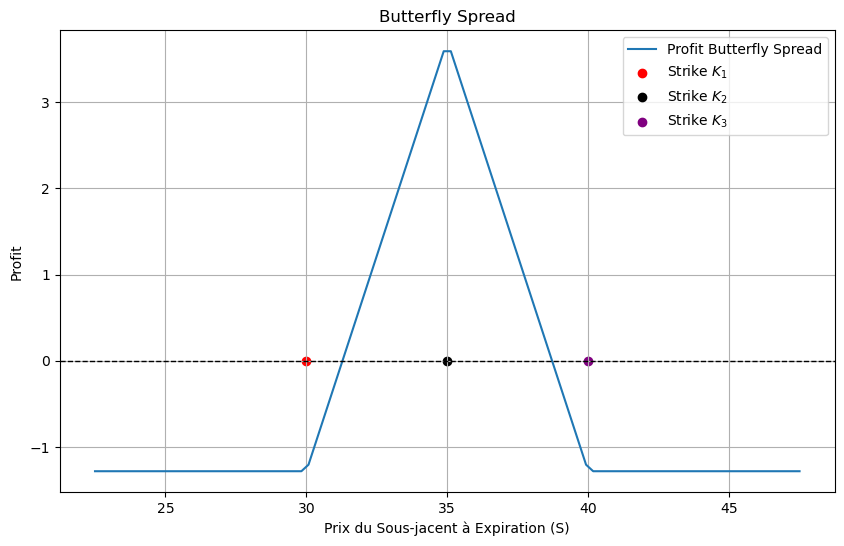

In [131]:
S_expiration = np.linspace(22.5, 47.5, 100)

call_1_initial_price = black_scholes_call(t, S_0, K_1, T, sigma, r, q)
call_2_initial_price = black_scholes_call(t, S_0, K_2, T, sigma, r, q)
call_3_initial_price = black_scholes_call(t, S_0, K_3, T, sigma, r, q)

profit_butterfly_spread = [(max(S - K_1, 0) - 2*max(S - K_2, 0) + max(S - K_3, 0) - call_1_initial_price + 2* call_2_initial_price - call_3_initial_price) for S in S_expiration]

plt.figure(figsize=(10, 6))
plt.plot(S_expiration, profit_butterfly_spread, label='Profit Butterfly Spread')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.scatter(K_1, 0, color='r', label=fr"Strike $K_1$", alpha = 1)
plt.scatter(K_2, 0, color='black', label=fr"Strike $K_2$", alpha = 1)
plt.scatter(K_3, 0, color='purple', label=fr"Strike $K_3$", alpha = 1)
plt.xlabel('Prix du Sous-jacent à Expiration (S)')
plt.ylabel('Profit')
plt.title('Butterfly Spread')
plt.legend()
plt.grid(True)
plt.show()

> **Exemple 2:** Déterminons le payoff à maturité du *short* butterfly spread en prenant une position courte sur un call $C_1$ de strike $30$, sur un call $C_3$ de strike $40$, et une position longue sur deux unités d'un call $C_2$ de strike $35$. Le portefeuille sera alors 
>
> $$V(T) = -C_1(T)+2\times C_2(T)-C_3(T) = -(S_T - 30)^+ + 2\times(S_T-35)^+ -(S_T - 40)^++C_1(0)-2C_2(0)+C_3(0),$$
>
> |           | $S_T < 30$   |  $30 < S_T <35 $    | $35 < S_T < 40 $       |$40 < S_T $       |
|:------------:|:--------------:|:---------------------:|:--------------------:|:--------------------:  
|$C_1(T)$     |$0$           |$S_T-30$             |$S_T-30$            |$S_T-30$ 
|$C_2(T)$     |$0$           |$0$                  |$S_T-35$            |$S_T-35$ 
|$C_3(T)$     |$0$           |$0$                  |$0$                 |$S_T-40$ 
|$V(T)$       |$0+C_1(0)-2C_2(0)+C_3(0)$           |$30-S_T+C_1(0)-2C_2(0)+C_3(0)$             |$S_T-40+C_1(0)-2C_2(0)+C_3(0)$            |$0+C_1(0)-2C_2(0)+C_3(0)$  
 


In [35]:
t = 0
S_0 = 32.5
K_1 = 30
K_2 = 35 
K_3 = 40
T = 1 
sigma = 0.2 
r = 0.05
q = 0 
print(f"V_0 = ", -black_scholes_call(t, S_0, K_1, T, sigma, r, q)+2*black_scholes_call(t, S_0, K_2, T, sigma, r, q)-black_scholes_call(t, S_0, K_3, T, sigma, r, q))

V_0 =  -1.2814905268694847


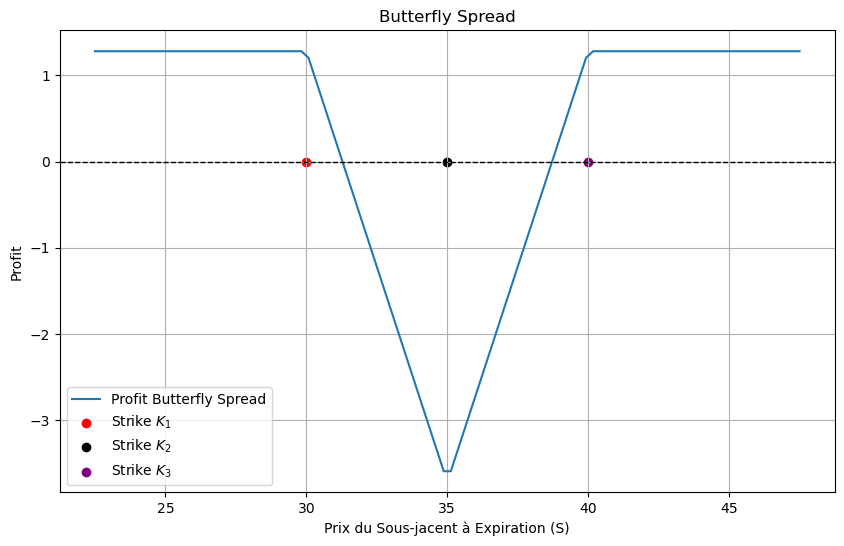

In [36]:
S_expiration = np.linspace(22.5, 47.5, 100)

call_1_initial_price = black_scholes_call(t, S_0, K_1, T, sigma, r, q)
call_2_initial_price = black_scholes_call(t, S_0, K_2, T, sigma, r, q)
call_3_initial_price = black_scholes_call(t, S_0, K_3, T, sigma, r, q)

profit_butterfly_spread = [(-max(S - K_1, 0) + 2*max(S - K_2, 0) - max(S - K_3, 0) + call_1_initial_price - 2* call_2_initial_price + call_3_initial_price) for S in S_expiration]

plt.figure(figsize=(10, 6))
plt.plot(S_expiration, profit_butterfly_spread, label='Profit Butterfly Spread')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.scatter(K_1, 0, color='r', label=fr"Strike $K_1$", alpha = 1)
plt.scatter(K_2, 0, color='black', label=fr"Strike $K_2$", alpha = 1)
plt.scatter(K_3, 0, color='purple', label=fr"Strike $K_3$", alpha = 1)
plt.xlabel('Prix du Sous-jacent à Expiration (S)')
plt.ylabel('Profit')
plt.title('Butterfly Spread')
plt.legend()
plt.grid(True)
plt.show()

#### 5.1.4) Box spread. <a id="part514"></a>

Un **Box spread** la combinaison d'un bull spread fondé sur des calls de strike $K_1$ et $K_2$ et d'un bear spread fondé sur des puts de même strike et de même maturité. 

> **Exemple:** Calculer le payoff d'un Box spread avec $K_1 = 30$, $K_2 = 35$. Autrement dit, nous allons : 
> * Prendre une position longue sur un call $C_1$ de strike $30$, et une position courte sur un call $C_2$ de strike $35$.
> * Prendre une position longue sur un put $P_1$ de strike $35$, et une position courte sur un put $P_2$ de strike $30$.
>
> Ainsi le portefeuille à échance sera : 
>
> $$V_T = (S_T - 30)^+ - (S_T - 35)^+ + (35 - S_T)^+ - (30-S_T)^+ -C_1(0) + C_2(0) -P_1(0) + P_2(0).$$ 
>
> En résumant ainsi les payoffs possibles dans un tableau on obtient : 
> |           | $S_T < 30$   |  $30 < S_T <35 $    | $35 < S_T$      
|:-------------:|:--------------:|:---------------------:|:--------------------:| 
|$C_1(T)$     |$0$           |$S_T-30$             |$S_T-30$            
|$C_2(T)$     |$0$           |$0$                  |$S_T-35$             
|$P_1(T)$     |$35 - S_T $   |$35 - S_T$           |$0$           
|$P_2(T)$     |$30 - S_T $   |$0$                  |$0$           
|Échéance       |$5$           |$5$                  |$5$    
>
> On remarque que le payoff est constant et est égal à $K_2 - K_1 = 5$. 
> C'est en fait en cas général et est une conséquence de l'absence d'opportunité d'arbitrage (elle même induite par la complétude du marché dans le modèle de Black - Scholes).

In [37]:
t = 0
S_0 = 32.5
K_1 = 30
K_2 = 35 
T = 1 
sigma = 0.2 
r = 0.05
q = 0 
print(f"V_0 = ", black_scholes_call(t, S_0, K_1, T, sigma, r, q)-black_scholes_call(t, S_0, K_2, T, sigma, r, q)+black_scholes_put(t, S_0, K_2, T, sigma, r, q)-black_scholes_put(t, S_0, K_1, T, sigma, r, q))

V_0 =  4.756147122503569


En faisant évoluer $5€$ au taux sans risque $r$ pendant $T = 1$ année, alors 

$$ 5\text{e}^{-0.05 \times 1} \approx 4.756147 = V_0.$$

Ceci confirme bien l'absence d'opportunité d'arbitrage. 

___________________________________________________________________________________________________________________

Voici également une autre façon de voir les choses, à l'aide d'un contrat forward. Pour rappel on peut construire un tel contrat en acheter un call européen et vendre un put européen de même strike et de même maturité (le payoff est de $S_T - K$). Concernant le box spread, il est composé de : 
1. Long Call $K_1$,      
2. Short Call $K_2$,    
3. Short Put $K_1$, 
4. Long Put $K_2$.

La combinaison de 1 et 3 produit une position longue sur un contrat forward avec un prix de livraison $K_1$, tandis que l'association de 2 et 4 produit une position courte sur un contrat forward avec un prix de livraison de $K_2$. 

L'association des 2 contrats engendre un payoff de $K_2 - K_1$. 

#### 5.1.5) Calendar spread. <a id="part515"></a>

Jusqu'à présent, nous avons supposé que les options composant les spreads arrivaient toutes à échéance à la même date. Dans le cas des **Calendar spreads**, les options ont le même strike mais des maturités différentes.

Le principe d'un calendar spread est le suivant : 
* soit on vend un call de strike donné et on achète un call (de même sous-jacent), mais dont la maturité est plus éloignée. Le prix d'un call étant une fonction croissante de la maturité (c.f. *greeks*), cette stratégie implique un investissement initial. 
* soit on vend un put de strike donné et on achète un put (de même sous-jancent), mais dont la maturité est plus éloignée. 

In [40]:
t = 0
S_0 = 32.5
K = 35 
T_1 = 0.5
T_2 = 1 
sigma = 0.2 
r = 0.05
q = 0

Représentons le payoff d'un spread calendaire. Ces derniers sont le plus souvent présentés de façon à traduire les payoffs à $T_1$, en supposant que l'option de maturité plus lointaine soit revendue à cette date. 

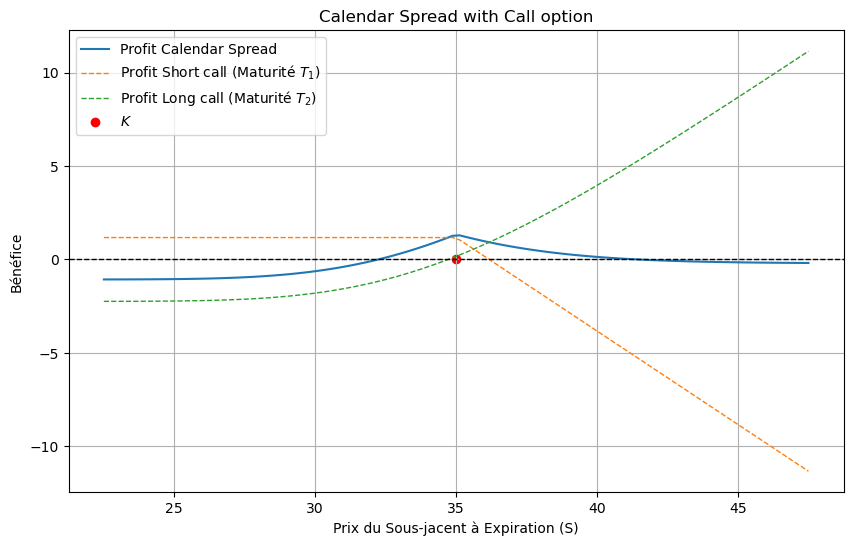

In [41]:
S_expiration = np.linspace(22.5, 47.5, 100)

call_1_initial_price = black_scholes_call(t, S_0, K, T_1, sigma, r, q)
call_2_initial_price = black_scholes_call(t, S_0, K, T_2, sigma, r, q)

profit_calendar_spread = [( - max(S - K, 0) + black_scholes_call(T_1, S, K, T_2, sigma, r, q) + call_1_initial_price - call_2_initial_price) for S in S_expiration]
short_call = [(- max(S-K,0) + call_1_initial_price) for S in S_expiration]
long_call = [(black_scholes_call(T_1, S, K, T_2, sigma, r, q)-call_2_initial_price) for S in S_expiration]

plt.figure(figsize=(10, 6))
plt.plot(S_expiration, profit_calendar_spread, label='Profit Calendar Spread')
plt.plot(S_expiration, short_call, linestyle='--', linewidth = 1, label=fr"Profit Short call (Maturité $T_1$)")
plt.plot(S_expiration, long_call, linestyle='--', linewidth = 1, label=fr"Profit Long call (Maturité $T_2$)")
plt.axhline(0, color='black', linestyle='--', linewidth= 1)
plt.scatter(K, 0, color='r', label=fr"$K$", alpha = 1)
plt.xlabel('Prix du Sous-jacent à Expiration (S)')
plt.ylabel('Bénéfice')
plt.title('Calendar Spread with Call option')
plt.legend()
plt.grid(True)
plt.show()

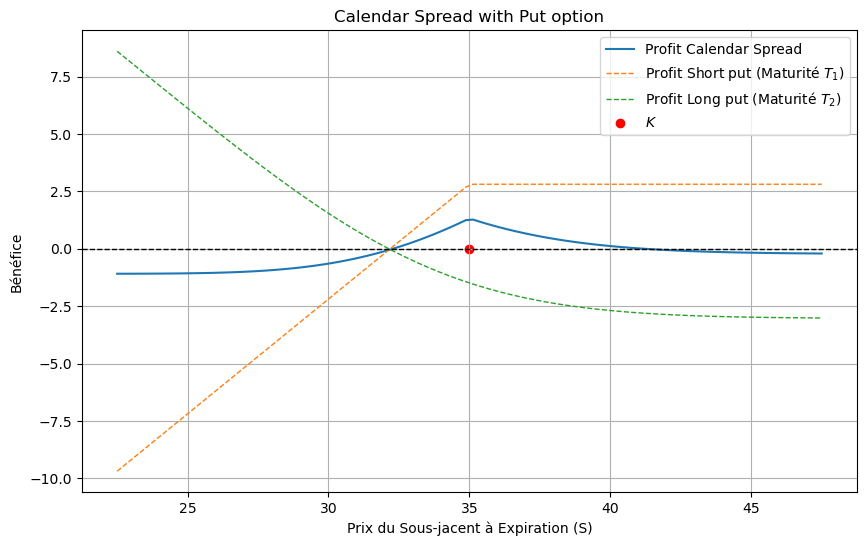

In [42]:
S_expiration = np.linspace(22.5, 47.5, 100)

put_1_initial_price = black_scholes_put(t, S_0, K, T_1, sigma, r, q)
put_2_initial_price = black_scholes_put(t, S_0, K, T_2, sigma, r, q)

profit_calendar_spread = [( - max(K - S, 0) + black_scholes_put(T_1, S, K, T_2, sigma, r, q) + put_1_initial_price - put_2_initial_price) for S in S_expiration]
short_put = [(- max(K - S,0) + put_1_initial_price) for S in S_expiration]
long_put = [(black_scholes_put(T_1, S, K, T_2, sigma, r, q) - put_2_initial_price) for S in S_expiration]

plt.figure(figsize=(10, 6))
plt.plot(S_expiration, profit_calendar_spread, label='Profit Calendar Spread')
plt.plot(S_expiration, short_put, linestyle='--', linewidth = 1, label=fr"Profit Short put (Maturité $T_1$)")
plt.plot(S_expiration, long_put, linestyle='--', linewidth = 1, label=fr"Profit Long put (Maturité $T_2$)")
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.scatter(K, 0, color='r', label=fr"$K$", alpha = 1)
plt.xlabel('Prix du Sous-jacent à Expiration (S)')
plt.ylabel('Bénéfice')
plt.title('Calendar Spread with Put option')
plt.legend()
plt.grid(True)
plt.show()

L'investisseur réalise un bénéfice si le cours de l'action à l'échéance de l'option à courte maturité est proche du strike. Cependant, une perte est observée si le cours de l'action s'éloigne significativement du strike (que ce soit à la hausse ou à la baisse). 

On distingue 3 types de calendar spreads : 
* Le *neutral calendar spread*, lorsque $K = S_0$. 
* Le *bullish calendar spread* (spread calendaire haussier), lorsque $K > S_0$. 
* Le *bearish calendar spread* (spread calendaire baissier), lorsque $K < S_0$. 

Un quatrième type est de calendar spread existe : c'est le *reverse calendar spread*, consistant à prendre une position longue sur un option de maturité courte et de vendre et sur une option de maturité plus courte. 

In [43]:
t = 0
S_0 = 32.5
K = 35 
T_1 = 0.5
T_2 = 1 
sigma = 0.2 
r = 0.05
q = 0

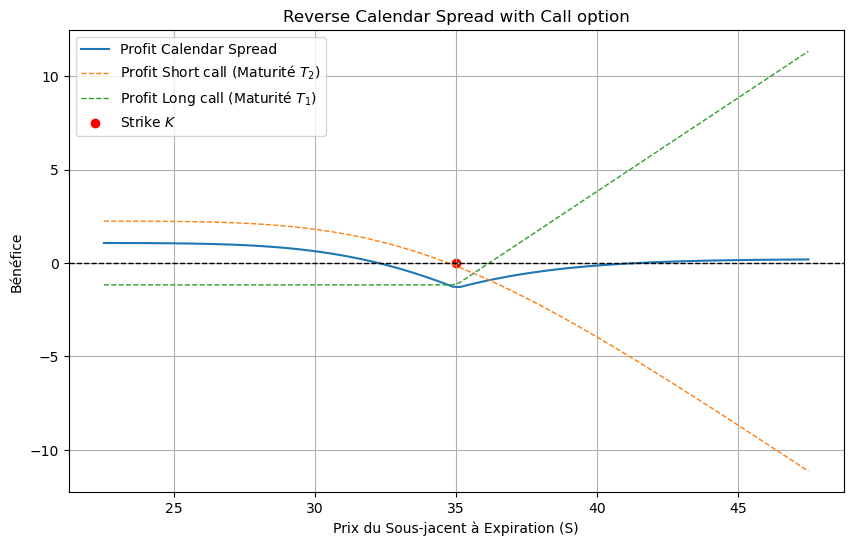

In [44]:
S_expiration = np.linspace(22.5, 47.5, 100)

call_1_initial_price = black_scholes_call(t, S_0, K, T_1, sigma, r, q)
call_2_initial_price = black_scholes_call(t, S_0, K, T_2, sigma, r, q)

profit_calendar_spread = [(max(S - K, 0) - black_scholes_call(T_1, S, K, T_2, sigma, r, q) - call_1_initial_price + call_2_initial_price) for S in S_expiration]
long_call = [ (max(S-K,0) - call_1_initial_price) for S in S_expiration]
short_call = [(-black_scholes_call(T_1, S, K, T_2, sigma, r, q)+call_2_initial_price) for S in S_expiration]

plt.figure(figsize=(10, 6))
plt.plot(S_expiration, profit_calendar_spread, label='Profit Calendar Spread')
plt.plot(S_expiration, short_call, linestyle='--', linewidth = 1, label=fr"Profit Short call (Maturité $T_2$)")
plt.plot(S_expiration, long_call, linestyle='--', linewidth = 1, label=fr"Profit Long call (Maturité $T_1$)")
plt.axhline(0, color='black', linestyle='--', linewidth= 1)
plt.scatter(K, 0, color='r', label=fr"Strike $K$", alpha = 1)
plt.xlabel('Prix du Sous-jacent à Expiration (S)')
plt.ylabel('Bénéfice')
plt.title('Reverse Calendar Spread with Call option')
plt.legend()
plt.grid(True)
plt.show()

#### 5.1.6) Diagonal spread. <a id="part516"></a>

Dans le cas de tous les spreads rencontrés jusqu'à présent, soit le strike diffère (Bull spread, Bear spread, ...), soit la maturité (calendar spread...). Dans le cas du **diagonal spread**, le strike et la maturité changent. 

In [45]:
t = 0
S_0 = 32.5 
K_1 = 32 
K_2 = 35 
T_1 = 1
T_2 = 2 
sigma = 0.2 
r = 0.05
q = 0

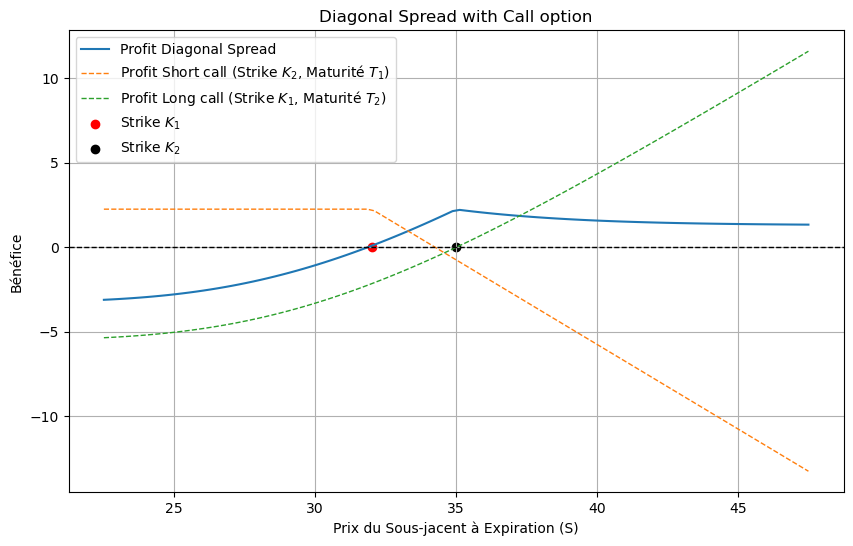

In [46]:
S_expiration = np.linspace(22.5, 47.5, 100)

call_1_initial_price = black_scholes_call(t, S_0, K_2, T_1, sigma, r, q)
call_2_initial_price = black_scholes_call(t, S_0, K_1, T_2, sigma, r, q)

profit_diagonal_spread = [( -max(S - K_2, 0)+black_scholes_call(T_1, S, K_1, T_2, sigma, r, q) + call_1_initial_price  - call_2_initial_price) for S in S_expiration]
short_call = [(-max(S-K_1, 0) + call_1_initial_price) for S in S_expiration]
long_call = [(black_scholes_call(T_1, S, K_1, T_2, sigma, r, q)-call_2_initial_price) for S in S_expiration]


plt.figure(figsize=(10, 6))
plt.plot(S_expiration, profit_diagonal_spread, label='Profit Diagonal Spread')
plt.plot(S_expiration, short_call, linestyle='--', linewidth = 1, label=fr"Profit Short call (Strike $K_2$, Maturité $T_1$)")
plt.plot(S_expiration, long_call, linestyle='--', linewidth = 1, label=fr"Profit Long call (Strike $K_1$, Maturité $T_2$)")
plt.axhline(0, color='black', linestyle='--', linewidth= 1)
plt.scatter(K_1, 0, color='r', label=fr"Strike $K_1$", alpha = 1)
plt.scatter(K_2, 0, color='black', label=fr"Strike $K_2$", alpha = 1)
plt.xlabel('Prix du Sous-jacent à Expiration (S)')
plt.ylabel('Bénéfice')
plt.title('Diagonal Spread with Call option')
plt.legend()
plt.grid(True)
plt.show()

#### 5.2) Les combinaisons. <a id="part52"></a>

Une combinaison est un cas particulier de stratégie d'options impliquant des prises de position à la fois dans des calls et de puts sur le même actif sous jacent.

#### 5.2.1) Les straddles. <a id="part521"></a>

Le **straddle** consiste en l'achat d'un call et d'un put de même maturité et de même strike. Cette stratégie est particulièrement adaptée quand il y a une probabilité non négligeable que le cours de l'actif varie drastiquement.

> **Exemple :** Déterminons le payoff à maturité du straddle consistant à prendre une position longue sur un call et sur un put où $S_0 = 32.5$, $K = 35$, $T = 1$, $r = 0.05$, $\sigma = 0.2$ et $q = 0$. 
>
> La valeur finale du portefeuille sera : 
>
> $$V_T = C_T + P_T = (S_T - K)^+ + (K-S_T)^+ - C_0 - P_0,$$
>
> |           | $S_T < K $   |  $K < S_T$    |
|:-------------:|:--------------:|:---------------:|
|$C_T$        |$0$           |$S_T-K$        |
|$P_T$        |$K-S_T$       |$0$            |
|$V_T$        |$K-S_T- C_0 - P_0$       |$S_T-K- C_0 - P_0$        |
 

In [108]:
t = 0
S_0 = 32.5
K = 35 
T = 1
sigma = 0.2 
r = 0.05
q = 0

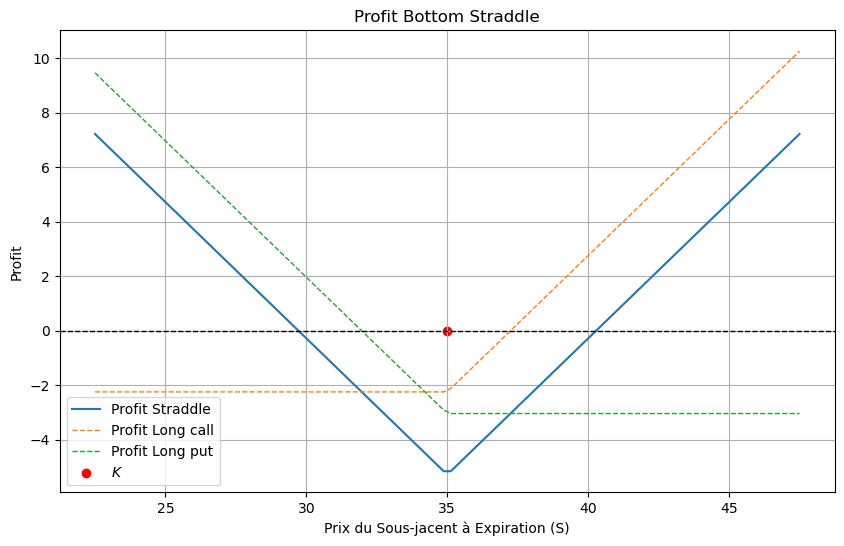

In [137]:
S_expiration = np.linspace(22.5, 47.5, 100)

call_initial_price = black_scholes_call(t, S_0, K, T, sigma, r, q)
put_initial_price = black_scholes_put(t, S_0, K, T, sigma, r, q)

profit_straddle = [(max(S - K, 0) + max(K - S, 0) - call_initial_price - put_initial_price ) for S in S_expiration]
long_call = [(max( S - K, 0) - call_initial_price) for S in S_expiration]
long_put = [(max(K - S, 0) - put_initial_price) for S in S_expiration]

plt.figure(figsize=(10, 6))
plt.plot(S_expiration, profit_straddle, label='Profit Straddle')
plt.plot(S_expiration, long_call, linestyle='--', linewidth = 1, label=fr"Profit Long call")
plt.plot(S_expiration, long_put, linestyle='--', linewidth = 1, label=fr"Profit Long put")
plt.axhline(0, color='black', linestyle='--', linewidth = 1)
plt.scatter(K, 0, color='r', label=fr"$K$", alpha = 1)
plt.xlabel('Prix du Sous-jacent à Expiration (S)')
plt.ylabel('Profit')
plt.title('Profit Bottom Straddle')
plt.legend()
plt.grid(True)
plt.show()

Dans la littérature ce type de straddle est appelé **bottom straddle**. Pour des positions inverses, nous parlerons de **top straddle**.  

> **Exemple :** Déterminons le payoff à maturité du straddle consistant à prendre une position courte sur un call et sur un put où $S_0 = 32.5$, $K = 35$, $T = 1$, $r = 0.05$, $\sigma = 0.2$ et $q = 0$. 
>
> La valeur finale du portefeuille sera : 
>
> $$V_T = - C_T - P_T = -(S_T - K)^+ - (K-S_T)^+ + C_0 + P_0,$$
>
> |           | $S_T < K $   |  $K < S_T$    |
|:-------------:|:--------------:|:---------------:|
|$C_T$        |$0$           |$S_T-K$        |
|$P_T$        |$K-S_T$       |$0$            |
|$V_T$        |$S_T-K+ C_0 + P_0$       |$K-S_T+ C_0 + P_0$        |
 

In [134]:
t = 0
S_0 = 32.5
K = 35 
T = 1
sigma = 0.2 
r = 0.05
q = 0

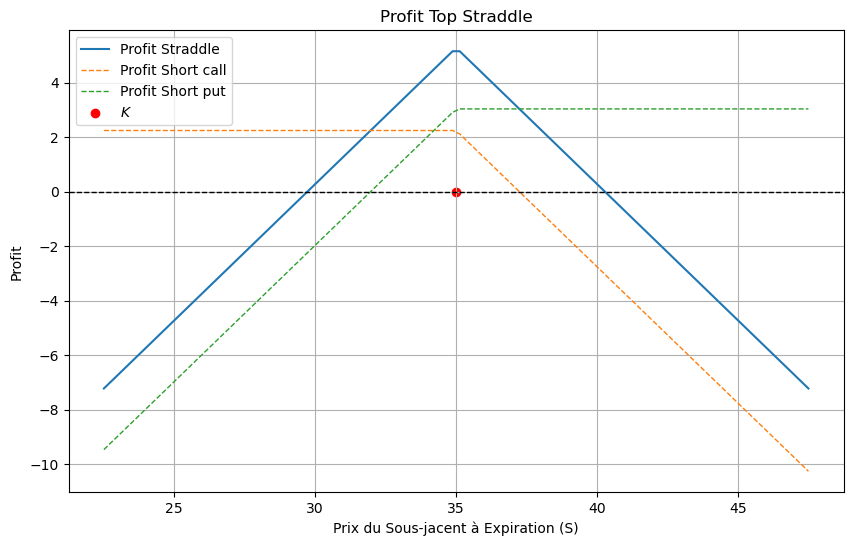

In [135]:
S_expiration = np.linspace(22.5, 47.5, 100)

call_initial_price = black_scholes_call(t, S_0, K, T, sigma, r, q)
put_initial_price = black_scholes_put(t, S_0, K, T, sigma, r, q)

profit_straddle = [(- max(S - K, 0) - max(K - S, 0) + call_initial_price + put_initial_price ) for S in S_expiration]
short_call = [(- max( S - K, 0) + call_initial_price) for S in S_expiration]
short_put = [(- max(K - S, 0) + put_initial_price) for S in S_expiration]

plt.figure(figsize=(10, 6))
plt.plot(S_expiration, profit_straddle, label='Profit Straddle')
plt.plot(S_expiration, short_call, linestyle='--', linewidth = 1, label=fr"Profit Short call")
plt.plot(S_expiration, short_put, linestyle='--', linewidth = 1, label=fr"Profit Short put")
plt.axhline(0, color='black', linestyle='--', linewidth= 1)
plt.scatter(K, 0, color='r', label=fr"$K$", alpha = 1)
plt.xlabel('Prix du Sous-jacent à Expiration (S)')
plt.ylabel('Profit')
plt.title('Profit Top Straddle')
plt.legend()
plt.grid(True)
plt.show()

**Attention :** Cette stratégie est beaucoup plus risquée que le *bottom straddle*. Si le cours de l'actif à maturité est proche du strike, un bénéfice important est réalisé. En revanche, les pertes engendrées par une forte variation du cours de l'action sont (théoriquement) illimitées. 

#### 5.2.2) Les strips et les straps. <a id="part522"></a>

* Un **strip** consiste en une position longue sur un call et sur deux puts de strike et de maturité identiques. En réalisant un strip, l'investisseur parie sur une forte variation du cours de l'action, mais en estimant qu'il est plus probable que le cours baisse plutôt qu'il n'augmente. 

* Un **strap** consiste en une position longue sur deux calls et sur un put de strike et de maturité identiques. En réalisant un strap, l'investisseur parie sur une forte variation du cours de l'action, mais en estimant qu'il est plus probable que le cours augmente plutôt qu'il ne baisse. 

> **Exemple 1:** Calculer le payoff d'un *strip* avec $S_0 = 32.5$, $K = 35$, $T = 1$, $r = 0.05$, $\sigma = 0.2$ et $q = 0$. 
>
> La valeur finale du portefeuille sera : 
>
> $$V_T = C_T +2\times P_T = (S_T - K)^+ +2\times (K-S_T)^+ - C_0 - 2P_0$$
>
> |           | $S_T < K $   |  $K < S_T$    |
|:-------------:|:--------------:|:---------------:|
|$C_T$        |$0$           |$S_T-K$        |
|$P_T$        |$K-S_T$       |$0$            |
|$V_T$        |$2(K-S_T)- C_0 - 2P_0$    |$S_T - K- C_0 - 2P_0$      |

> **Exemple 2:** Calculer le payoff d'un *strap* avec $S_0 = 32.5$, $K = 35$, $T = 1$, $r = 0.05$, $\sigma = 0.2$ et $q = 0$. 
>
> La valeur finale du portefeuille sera : 
>
> $$V_T = 2\times C_T + P_T = 2\times (S_T - K)^+ +(K-S_T)^+ - 2C_0 - P_0$$
>
> |           | $S_T < K $   |  $K < S_T$              |
|:-------------:|:--------------:|:-------------------------:|
|$C_T$        |$0$           |$S_T-K$                  |
|$P_T$        |$K-S_T$       |$0$                      |
|$V_T$        |$K - S_T- 2C_0 - P_0$    |$2(S_T - K)- 2C_0 - P_0$      |

In [7]:
t = 0
S_0 = 32.5
K = 35 
T = 1
sigma = 0.2 
r = 0.05
q = 0

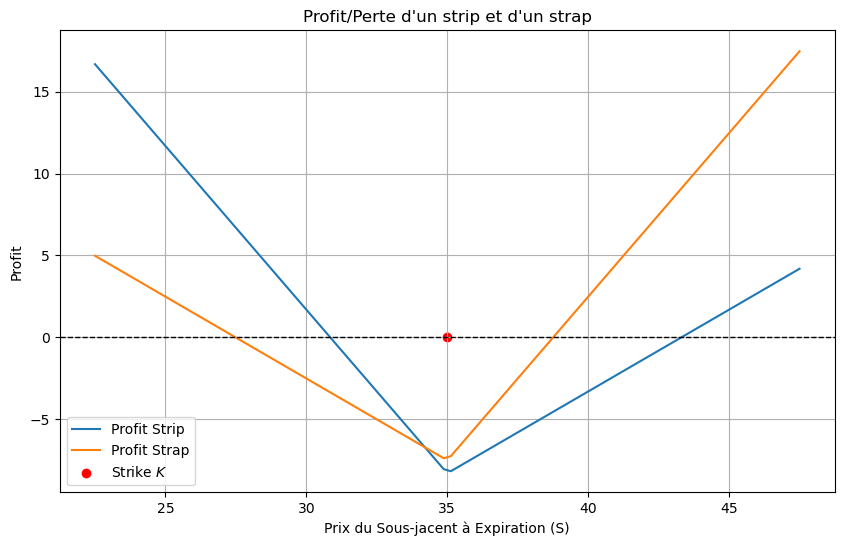

In [9]:
S_expiration = np.linspace(22.5, 47.5, 100)

call_initial_price = black_scholes_call(t, S_0, K, T, sigma, r, q)
put_initial_price = black_scholes_put(t, S_0, K, T, sigma, r, q)

profit_strip = [(max(S - K, 0) + 2 * max(K - S, 0) - call_initial_price - 2*put_initial_price) for S in S_expiration]
profit_strap = [(2*max(S - K, 0) + max(K - S, 0) - 2*call_initial_price - put_initial_price) for S in S_expiration]

plt.figure(figsize=(10, 6))
plt.plot(S_expiration, profit_strip, label='Profit Strip')
plt.plot(S_expiration, profit_strap, label='Profit Strap')
plt.scatter(K, 0, color='r', label=fr"Strike $K$", alpha = 1)
plt.axhline(0, color='black', linestyle='--', linewidth= 1)
plt.xlabel('Prix du Sous-jacent à Expiration (S)')
plt.ylabel('Profit')
plt.title('Profit/Perte d\'un strip et d\'un strap')
plt.legend()
plt.grid(True)
plt.show()

#### 5.2.3) Les strangles. <a id="part523"></a>

Un **strangle** est une stratégie semblable au straddle. Cependant, ici l'investisseur parie sur une variation plus importante du cours du sous-jacent. 
Afin de construire une telle stratégie, l'investisseur doit acheter un call de strike $K_2$, et un put de strike $K_1 < K_2$, de même maturité. 

> **Exemple:** Calculer le payoff d'un *strangle* avec $S_0 = 32.5$, $K_1 = 30$, $K_2 = 35$, $T = 1$, $r = 0.05$, $\sigma = 0.2$ et $q = 0$. 
>
> La valeur finale du portefeuille sera : 
>
> $$V_T = C_T + P_T = (S_T - K_2)^+ +(K_1-S_T)^+ - C_0 - P_0,$$
>
> |           | $S_T < K_1 $   |  $K_1 < S_T < K_2$    |  $K_2 < S_T$    |
|:-------------:|:--------------:|:---------------:|:---------------:|
|$C_T$        |$0$           |$0$            |$S_T - K_2$    |
|$P_T$        |$K_1-S_T$     |$0$            |$0$            |
|$V_T$        |$K_1-S_T- C_0 - P_0$     |$- C_0 - P_0$            |$S_T - K_2- C_0 - P_0$    |

In [15]:
t = 0
S_0 = 32.5
K_1 = 30
K_2 = 35
T = 1
sigma = 0.2 
r = 0.05
q = 0

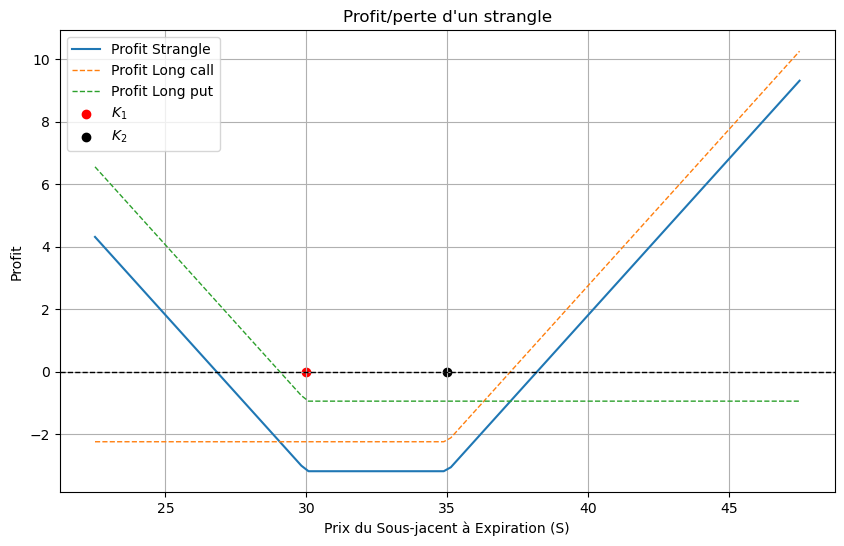

In [16]:
S_expiration = np.linspace(22.5, 47.5, 100)

call_initial_price = black_scholes_call(t, S_0, K_2, T, sigma, r, q)
put_initial_price = black_scholes_put(t, S_0, K_1, T, sigma, r, q)

profit_strangle = [(max(S - K_2, 0) + max(K_1 - S, 0) - call_initial_price - put_initial_price ) for S in S_expiration]
long_call = [(max( S - K_2, 0) - call_initial_price) for S in S_expiration]
long_put = [(max(K_1 - S, 0) - put_initial_price) for S in S_expiration]

plt.figure(figsize=(10, 6))
plt.plot(S_expiration, profit_strangle, label='Profit Strangle')
plt.plot(S_expiration, long_call, linestyle='--', linewidth = 1, label=fr"Profit Long call")
plt.plot(S_expiration, long_put, linestyle='--', linewidth = 1, label=fr"Profit Long put")
plt.axhline(0, color='black', linestyle='--', linewidth= 1)
plt.scatter(K_1, 0, color='r', label=fr"$K_1$", alpha = 1)
plt.scatter(K_2, 0, color='black', label=fr"$K_2$", alpha = 1)
plt.xlabel('Prix du Sous-jacent à Expiration (S)')
plt.ylabel('Profit')
plt.title('Profit/perte d\'un strangle')
plt.legend()
plt.grid(True)
plt.show()

Remarquons que plus les strikes sont éloignés, plus l'amplitude de la perte est faible et plus la variation du cours de l'action devrai être forte pour espérer engendrer des bénéfices. 

À l'instar d'un *top straddle*, la vente d'un strangle peut se révéler judicieuse pour un investisseur qui estime qu'une forte variation du cours de l'action est improbable. Néanmois c'est une opération très risquée, car les pertes ne sont pas bornées. 